In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
df = pd.read_csv("train.csv").iloc[:, 1:].reset_index()
df.head()

index  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0      0    22       26    119.910995   242.838324   -316.819222   
1      1    10       16    -90.790536  -269.470767   -182.581844   
2      2    21       42    -20.028003  -147.070212     50.280872   
3      3    21       17    -21.258567     0.467070    -86.164153   
4      4    18       16    -58.154501   -13.051195   -156.501167   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  
0         250.195048        -53.547777        -112.049983       2  
1          95.394941         37.291944          48.525180       0  
2         -90.750386        -50.476556          85.399009       1  
3         -21.813529       -209.256006          16.291882       0  
4          48.392938       -110.008860         -10.285138       2

In [4]:
train = df.copy()
train.head()

index  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0      0    22       26    119.910995   242.838324   -316.819222   
1      1    10       16    -90.790536  -269.470767   -182.581844   
2      2    21       42    -20.028003  -147.070212     50.280872   
3      3    21       17    -21.258567     0.467070    -86.164153   
4      4    18       16    -58.154501   -13.051195   -156.501167   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  
0         250.195048        -53.547777        -112.049983       2  
1          95.394941         37.291944          48.525180       0  
2         -90.750386        -50.476556          85.399009       1  
3         -21.813529       -209.256006          16.291882       0  
4          48.392938       -110.008860         -10.285138       2

In [5]:
len(df)

7001

In [6]:
df.describe()

index         Hour      Minutes  Sensor_alpha  Sensor_beta  \
count  7001.00000  7001.000000  7001.000000   7001.000000  7001.000000   
mean   3500.00000    19.598914    29.405942      0.477171   -29.974117   
std    2021.15895     3.507008    17.375830     99.294856   133.095125   
min       0.00000     1.000000     0.000000   -404.898823  -656.272666   
25%    1750.00000    19.000000    14.000000    -68.573905  -116.060383   
50%    3500.00000    21.000000    29.000000     -0.287447   -36.171567   
75%    5250.00000    21.000000    44.000000     66.480795    56.637778   
max    7000.00000    23.000000    59.000000    351.256221   518.395878   

       Sensor_gamma  Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  \
count   7001.000000        7001.000000       7001.000000        7001.000000   
mean      -5.624690           7.188060         -0.757901          -0.554533   
std      115.871391         122.327980        100.039477         100.535951   
min     -448.478039        -437.205393       -387.567443        -374.961689   
25%      -83.508747         -79.496687        -68.061596         -69.652647   
50%       -1.217606          -1.133567         -0.444124           0.027128   
75%       76.870277          93.285286         66.181909          67.838524   
max      378.349287         462.556319        345.279240         363.682391   

            Insect  
count  7001.000000  
mean      0.595772  
std       0.661604  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       2.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


##### Data engineering & Exploratory Data Analysis

In [8]:
def missing_data(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    return missing_data

In [9]:
def correlations(x):
    numerical = x.select_dtypes(include=['int64','float64','Int64'])[:]
    plt.figure(figsize=(36,6), dpi=140)
    for j,i in enumerate(['pearson','kendall','spearman']):
        plt.subplot(1,3,j+1)
        correlation = numerical.dropna().corr(method=i)
        sns.heatmap(correlation, linewidth = 2, square=True, annot=True, cmap='BrBG')
        plt.title(i, fontsize=28)

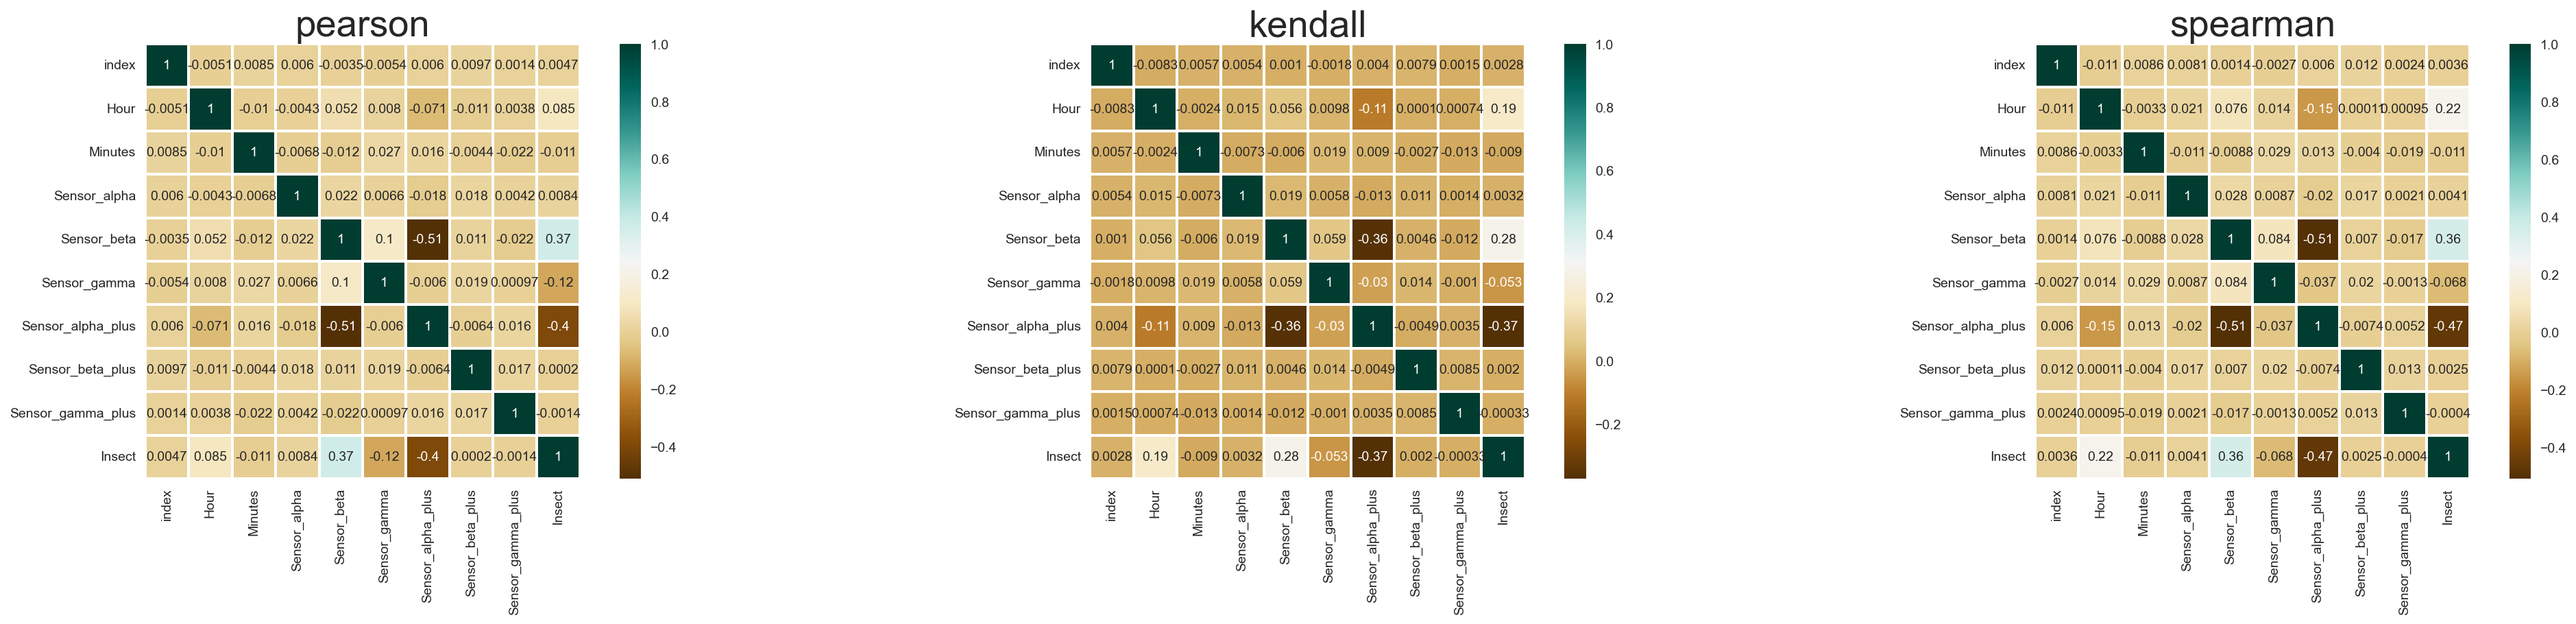

In [10]:
correlations(df)

Just by looking at the correlation matrix, we may pressume that the distribution shape is probably normal since there are similarities between the pearson and the rank correlations. We should focus on making an analysis of the following features due to its relatively high correlation with "Insect": "Hour", "Sensor_beta", "Sensor_gamma", and "Sensor_alpha_plus".

In [11]:
missing_data(df)

Total  Percent
index                  0      0.0
Hour                   0      0.0
Minutes                0      0.0
Sensor_alpha           0      0.0
Sensor_beta            0      0.0
Sensor_gamma           0      0.0
Sensor_alpha_plus      0      0.0
Sensor_beta_plus       0      0.0
Sensor_gamma_plus      0      0.0
Insect                 0      0.0

This is great, since we have no missing data at all, we don't have to deal with the headache of imputation and can focus on playing with the distributions and check the correlations. As we can see, we have an overall very weak correlation except for that variable of "Sensor_beta", "Sensor_gamma", and "Sensor_alpha_plus" with "Insect". Thus, This gives us our first insight, and shows us the steps we should follow. Besides, since the data is numeric, we don't have to deal with one hot encoding, and we can proceed further with our analysis.

##### Testing Skewness and Kurtosis

In [12]:
df.skew(),  df.kurt()

(index                0.000000
 Hour                -3.256892
 Minutes              0.008322
 Sensor_alpha         0.054845
 Sensor_beta          0.035085
 Sensor_gamma        -0.211118
 Sensor_alpha_plus    0.166451
 Sensor_beta_plus     0.009182
 Sensor_gamma_plus   -0.038108
 Insect               0.665218
 dtype: float64,
 index                -1.200000
 Hour                 11.410643
 Minutes              -1.205350
 Sensor_alpha          0.000219
 Sensor_beta           0.369877
 Sensor_gamma         -0.012791
 Sensor_alpha_plus    -0.083972
 Sensor_beta_plus      0.005171
 Sensor_gamma_plus    -0.080712
 Insect               -0.615610
 dtype: float64)

<AxesSubplot:title={'center':'Log Normal'}, xlabel='Sensor_alpha_plus'>

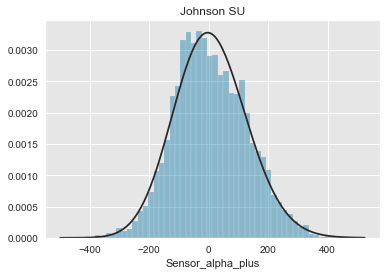

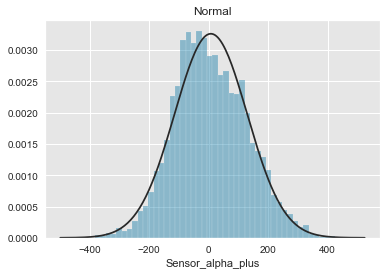

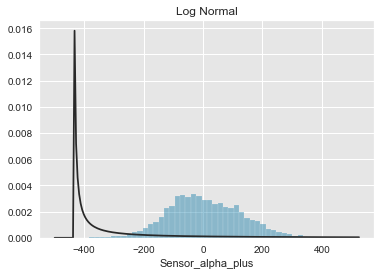

In [13]:
y = df['Sensor_alpha_plus']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

##### Boxplots

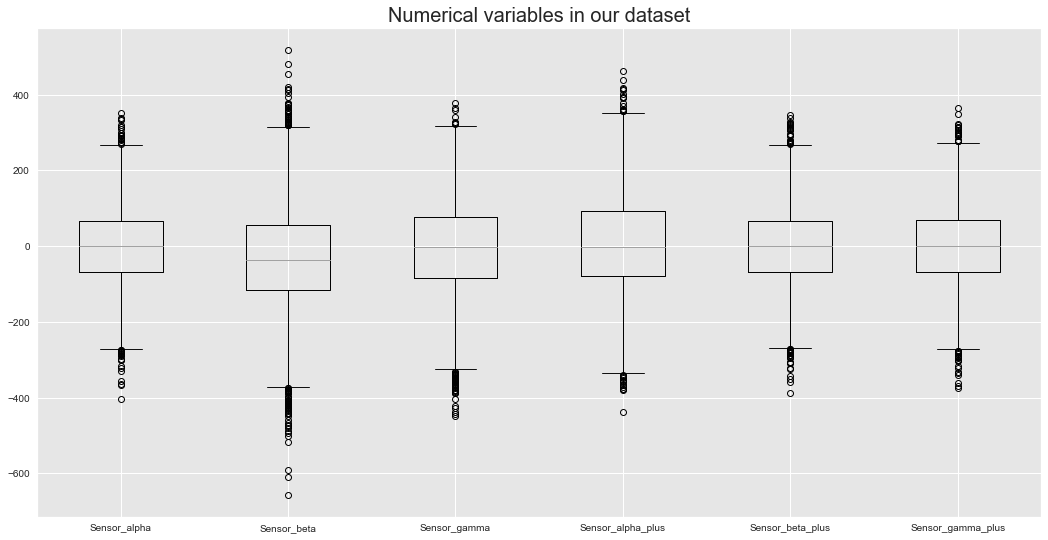

In [14]:
num_cols = ["Sensor_alpha", "Sensor_beta", "Sensor_gamma", "Sensor_alpha_plus", "Sensor_beta_plus", "Sensor_gamma_plus"]
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataset", fontsize=20)
plt.show()

We can assure that there is a symmetric distribution of data, except for the case of hours. That is, the bulk of hours is mainly found at the right corner.

<AxesSubplot:xlabel='count', ylabel='Insect'>

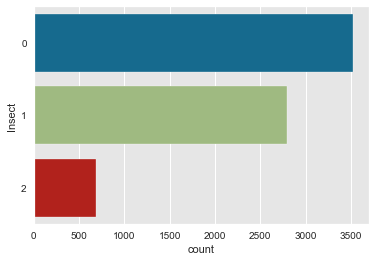

In [15]:
sns.countplot(y=df["Insect"])

Since the data from the sensors was taken during a specific time, it makes sense to study the behaviour of the data with a bivariate analysis of the time and the specific sensor. Also, we can notice that the Insect with value "2" is the most rare of the 3.

<AxesSubplot:xlabel='Hour', ylabel='Sensor_beta'>

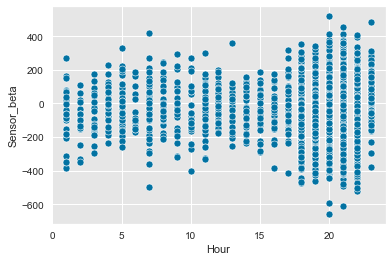

In [16]:
sns.scatterplot(data=df, x="Hour", y="Sensor_beta")

<AxesSubplot:xlabel='Hour', ylabel='Sensor_gamma'>

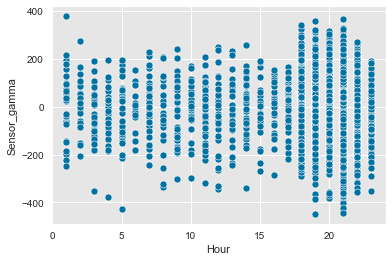

In [17]:
sns.scatterplot(data=df, x="Hour", y="Sensor_gamma")

<AxesSubplot:xlabel='Sensor_beta', ylabel='Sensor_alpha_plus'>

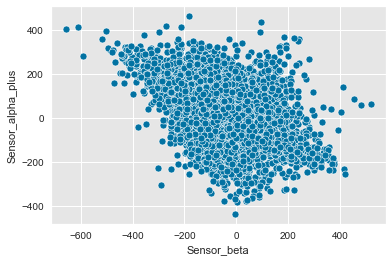

In [18]:
sns.scatterplot(data=df, x="Sensor_beta", y="Sensor_alpha_plus")

Apparently, there is no pattern in the relation. However, we must take into account that we are dealing with high kurtosis and skewness. So, what should we do next? Transform the hour variable. That would be an option. To do so, we would proceed either with a logarithmic or Box-Cox transformation. However, we might also think of splitting the data set. But before that, can we assure there is no normality? Let's check homoskedasticity with a qq-plot.

In [19]:
def qqp(x):
    sm.qqplot(x, line = "45")
    plt.show()

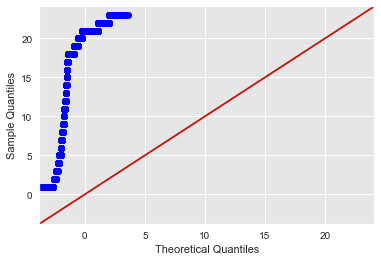

In [20]:
qqp(df["Hour"])

Doesn't look very good

(array([0.00503175, 0.00389555, 0.00438249, 0.00519406, 0.00730415,
        0.00259703, 0.00649258, 0.00486943, 0.        , 0.00519406,
        0.00438249, 0.00649258, 0.00616795, 0.00438249, 0.00616795,
        0.00438249, 0.        , 0.00486943, 0.00665489, 0.12206048,
        0.11686642, 0.13050084, 0.52508733, 0.13017621, 0.02321097]),
 array([ 1.  ,  1.88,  2.76,  3.64,  4.52,  5.4 ,  6.28,  7.16,  8.04,
         8.92,  9.8 , 10.68, 11.56, 12.44, 13.32, 14.2 , 15.08, 15.96,
        16.84, 17.72, 18.6 , 19.48, 20.36, 21.24, 22.12, 23.  ]),
 <BarContainer object of 25 artists>)

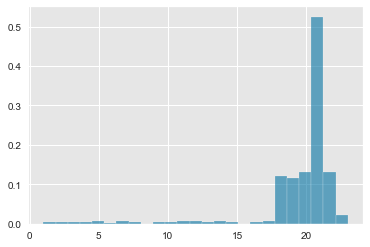

In [21]:
plt.hist(df["Hour"], bins=25, density=True, alpha=0.6, color='b')

Our thoughts were true, we are dealing we a huge fat tail on the left that clouds our vision.

##### Dealing with the fat tails

As we mentioned, we have 2 options, either we ignore the hours below 18 and use a transformation to deal with it in a measure of proportion, or we perform 2 different studies dividing the data set. For this specific case, I support the idea of the data set division.

In [22]:
# Counting the hours
pd.DataFrame(df.groupby(['Hour'])['Hour'].count().sort_values(ascending=False))

Hour
Hour      
21    3235
20     804
22     802
18     752
19     720
23     143
5       45
17      41
7       40
11      40
14      38
12      38
9       32
4       32
1       31
16      30
8       30
13      27
15      27
10      27
3       27
2       24
6       16

As we thought, the bulk of observations is between 18 and 23 hours. The rest requires to be splitted, and studied as a different data set.

In [23]:
df_lower = df[df["Hour"] < 18]
df_upper = df[df["Hour"] >= 18]

In [24]:
len(df_lower)

545

In [25]:
len(df_upper)

6456

In [26]:
len(df) == (len(df_upper) + len(df_lower))

True

In [27]:
pd.DataFrame(df_upper.groupby(['Hour'])['Hour'].count().sort_values(ascending=False))

Hour
Hour      
21    3235
20     804
22     802
18     752
19     720
23     143

Now we can get down to business and explore the both data sets as different distributions just to asses the theory that hour plays an important role in predicting the output of our dependent variable

In [28]:
df_lower["Hour"].skew(), df_lower["Hour"].kurtosis()

(-0.04487927245460859, -1.1727524057355763)

In [29]:
df_upper["Hour"].skew(), df_upper["Hour"].kurtosis()

(-0.6469931605477907, -0.30337807429780783)

In both cases, kurtosis and skewness aren't high anymore. Nevertheless, the case of kurtosis in the df_lower is above 1. But at least it's not the skewness. 

(array([31., 24., 27., 32., 45., 16., 40., 30.,  0., 32., 27., 40., 38.,
        27., 38., 27., 30., 41.]),
 array([ 1.        ,  1.88888889,  2.77777778,  3.66666667,  4.55555556,
         5.44444444,  6.33333333,  7.22222222,  8.11111111,  9.        ,
         9.88888889, 10.77777778, 11.66666667, 12.55555556, 13.44444444,
        14.33333333, 15.22222222, 16.11111111, 17.        ]),
 <BarContainer object of 18 artists>)

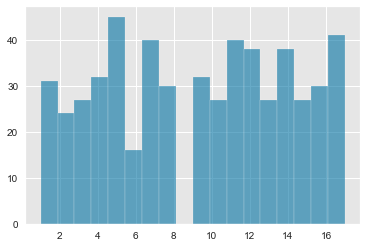

In [30]:
plt.hist(df_lower["Hour"], bins=18, density=False, alpha=0.6, color='b')

(array([ 752.,  720.,  804., 3235.,  802.,  143.]),
 array([18.        , 18.83333333, 19.66666667, 20.5       , 21.33333333,
        22.16666667, 23.        ]),
 <BarContainer object of 6 artists>)

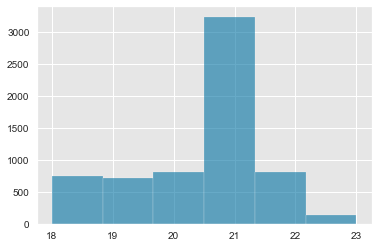

In [31]:
plt.hist(df_upper["Hour"], bins=6, density=False, alpha=0.6, color='b')

In [32]:
numerical_upper = df_upper.select_dtypes(include=['int64','float64','Int64'])[:]
numerical_lower = df_lower.select_dtypes(include=['int64','float64','Int64'])[:]

<Figure size 840x560 with 0 Axes>

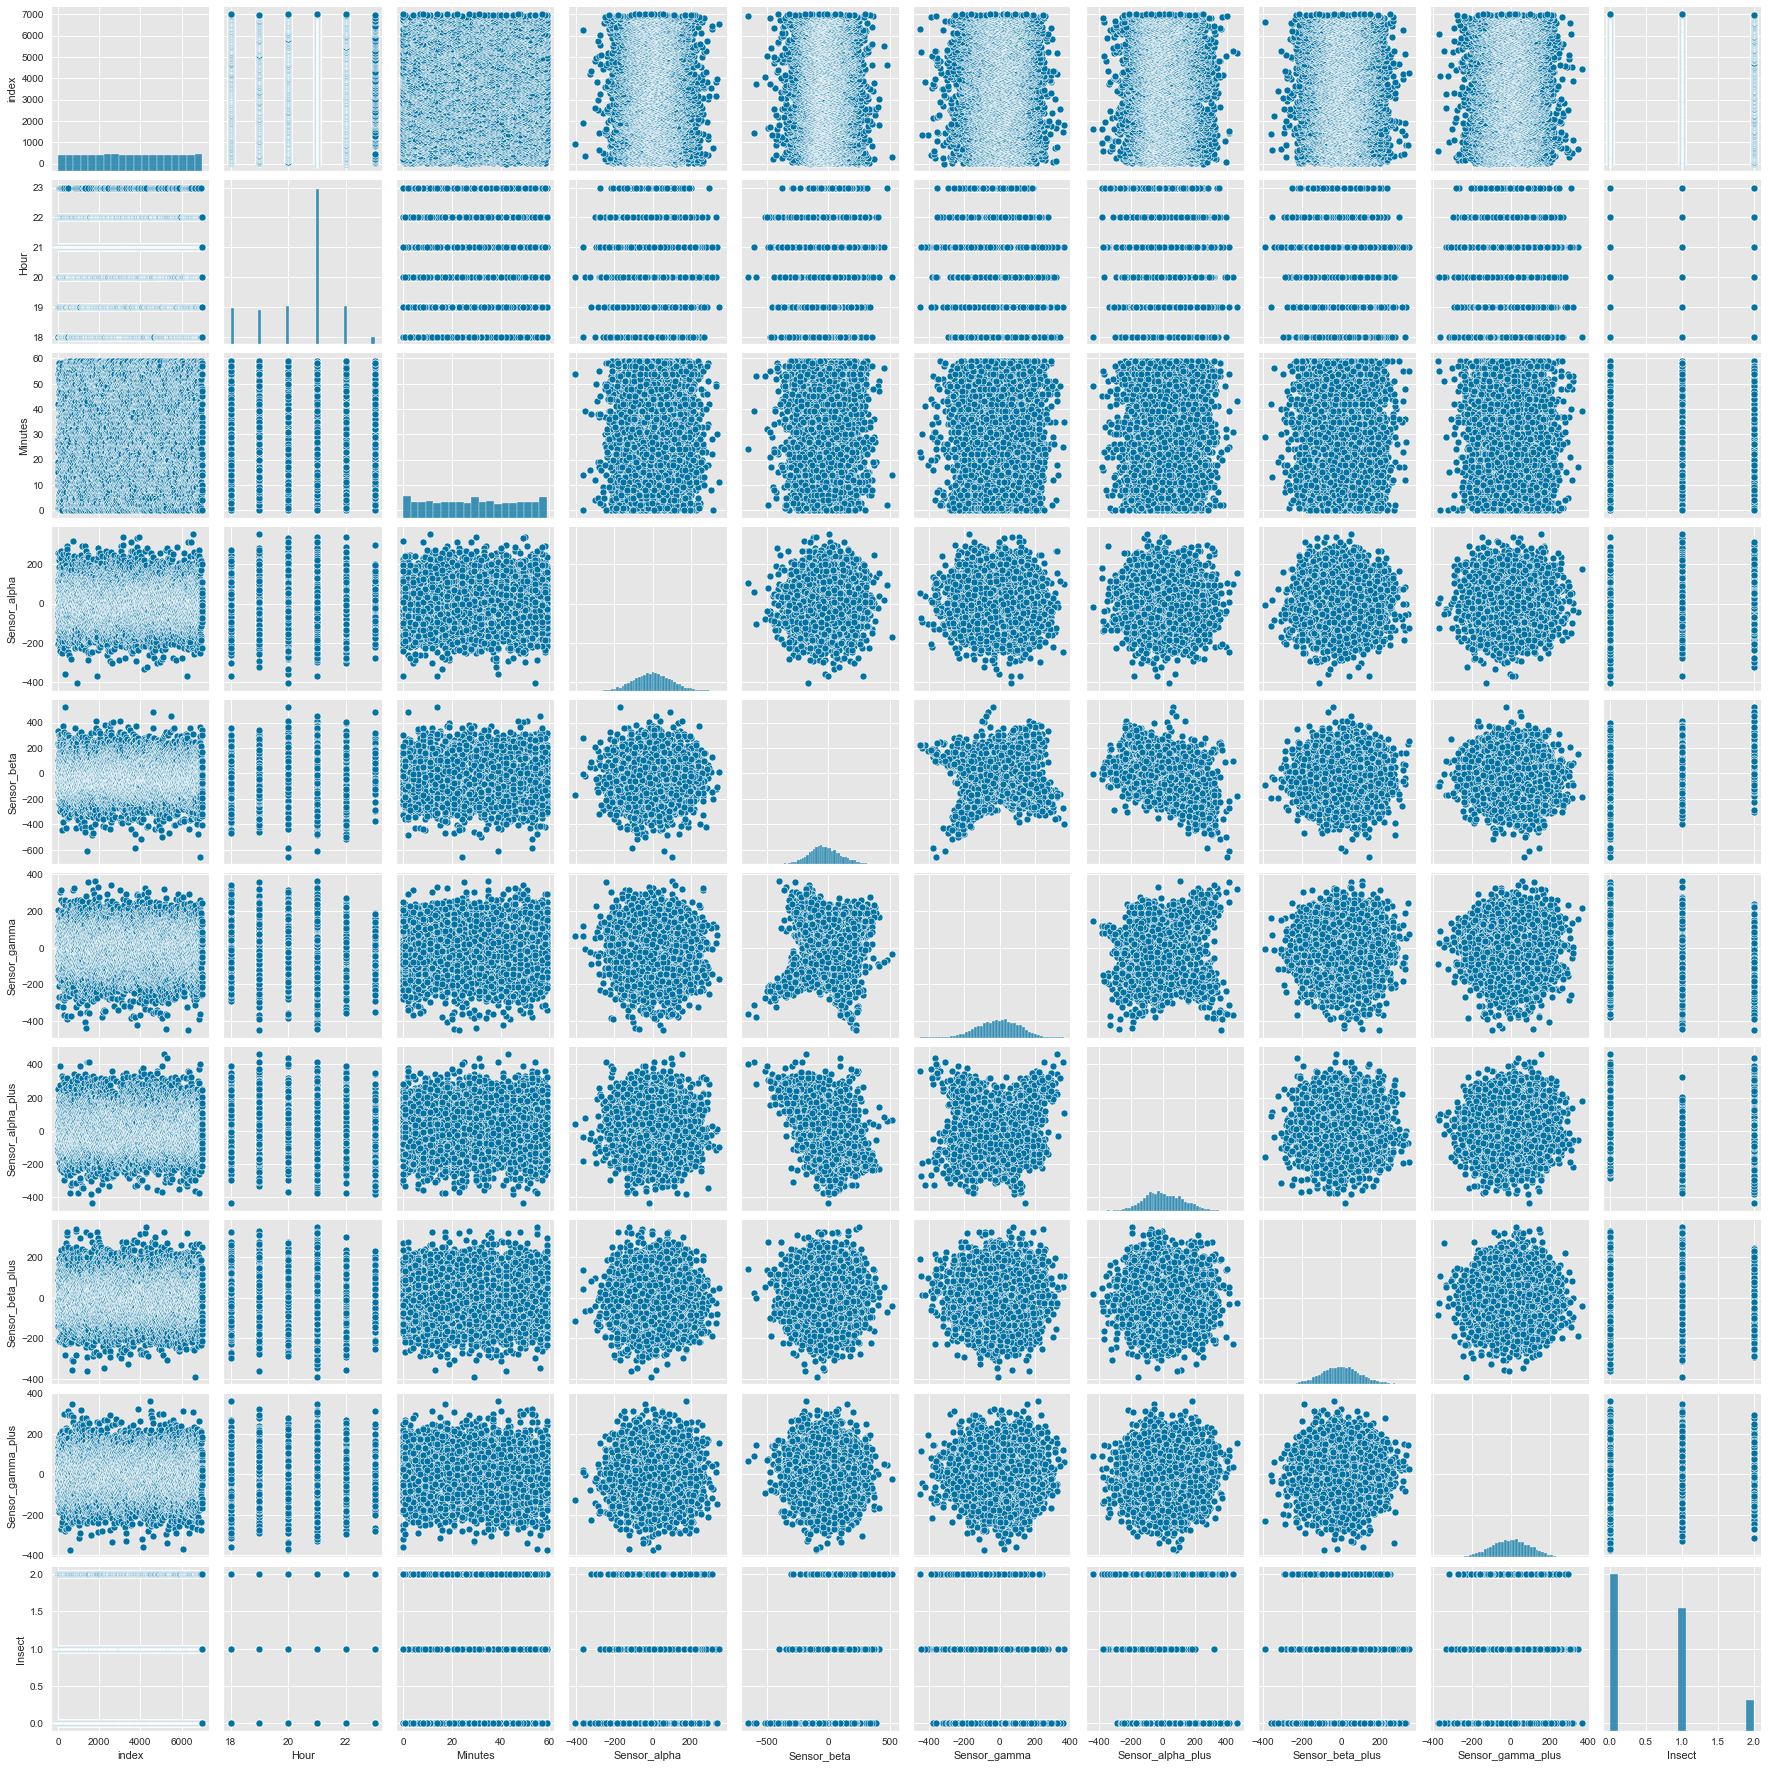

In [33]:
plt.figure(dpi=140)
sns.pairplot(numerical_upper)
plt.show()

<Figure size 840x560 with 0 Axes>

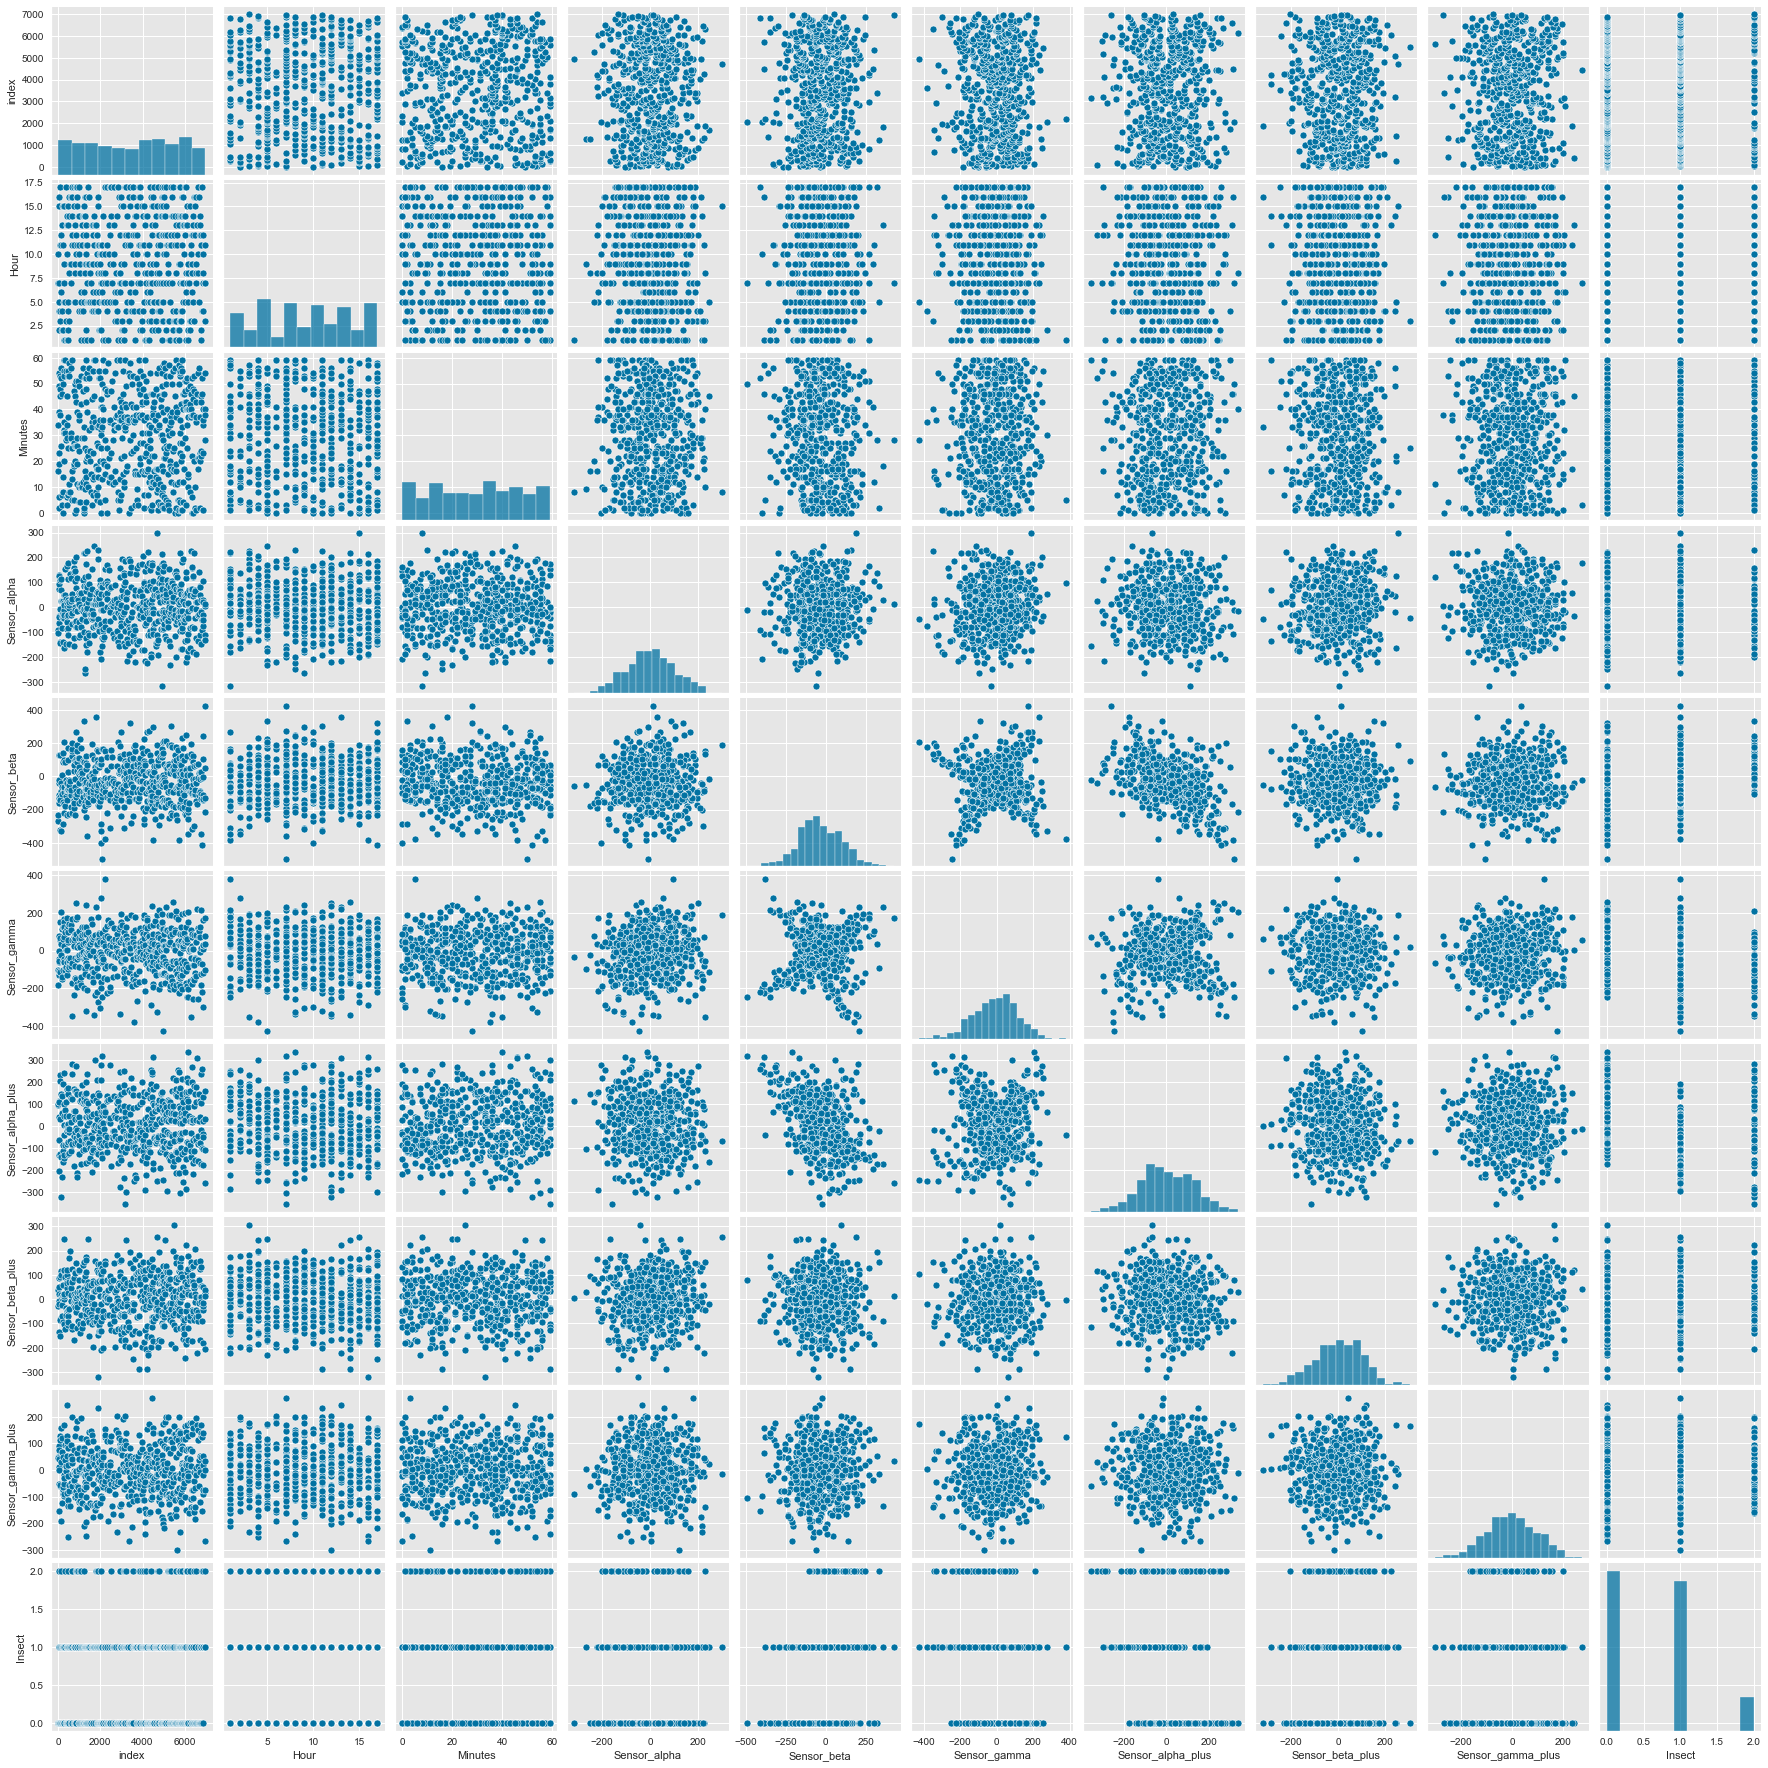

In [34]:
plt.figure(dpi=140)
sns.pairplot(numerical_lower)
plt.show()

Now we know for sure that there is no pattern to be found in the data distributions. However, there is one last thing it is important to check, that is, the disparity between the counts of the 3 types of insects among the 2 distributions in the form of relative values.

In [35]:
pd.DataFrame((df_lower.groupby("Insect")["Hour"].count() / len(df_lower)).sort_values(ascending=False))

Hour
Insect          
0       0.466055
1       0.436697
2       0.097248

In [36]:
pd.DataFrame((df_upper.groupby("Insect")["Hour"].count() / len(df_upper)).sort_values(ascending=False))

Hour
Insect          
0       0.505731
1       0.395756
2       0.098513

Apparently, there are no significant differences in terms of relative values. Now let's hypothesize whether it would be useful to perform a dimensionality reduction or a clustering in our EDA, since we have features with very low correlation.

##### Testing with dimensionality reduction and clustering

In [37]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [38]:
scaled_df.head()

index      Hour   Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0 -1.731803  0.684702 -0.196030      1.202906     2.049902     -2.685881   
1 -1.731309 -2.737262 -0.771583     -0.919224    -1.799568     -1.527295   
2 -1.730814  0.399539  0.724855     -0.206523    -0.879855      0.482514   
3 -1.730319  0.399539 -0.714028     -0.218917     0.228734     -0.695126   
4 -1.729824 -0.455952 -0.771583     -0.590523     0.127158     -1.302196   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus    Insect  
0           1.986662         -0.527728          -1.109090  2.122613  
1           0.721120          0.380375           0.488216 -0.900561  
2          -0.800679         -0.497026           0.855014  0.611026  
3          -0.237098         -2.084307           0.167578 -0.900561  
4           0.336863         -1.092156          -0.096794  2.122613

In [39]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  7001.0 -1.506516e-17  1.368718 -3.767477 -1.017039 -0.034348  1.005889   
col2  7001.0  1.705733e-17  1.038370 -3.201592 -0.733240 -0.048247  0.725188   
col3  7001.0 -5.837155e-17  1.018577 -3.581104 -0.698320  0.023493  0.684905   

           max  
col1  5.111935  
col2  3.611646  
col3  3.869676

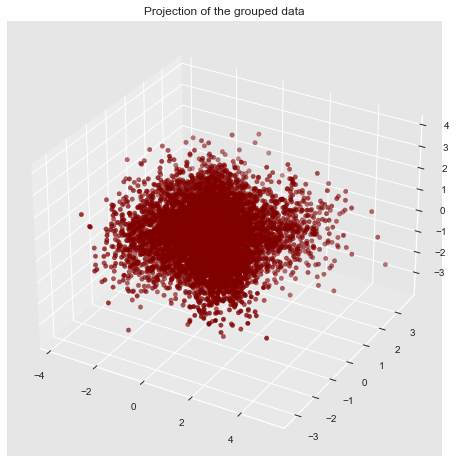

In [40]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Projection of the grouped data")
plt.show()


Elbow Method to determine the number of clusters to be formed:

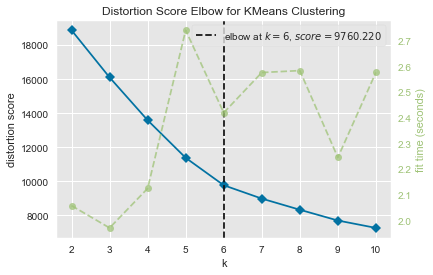

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show() 

In [42]:
AC = AgglomerativeClustering(n_clusters=6)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

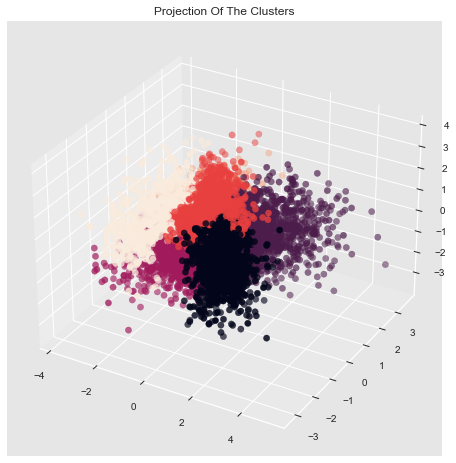

In [43]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("Projection Of The Clusters")
plt.show()

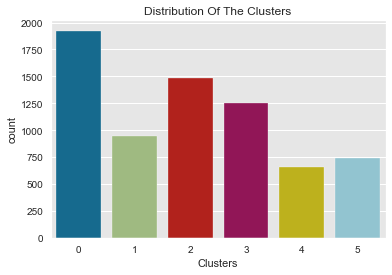

In [44]:
pl = sns.countplot(x=df["Clusters"]) 
pl.set_title("Distribution Of The Clusters")
plt.show()

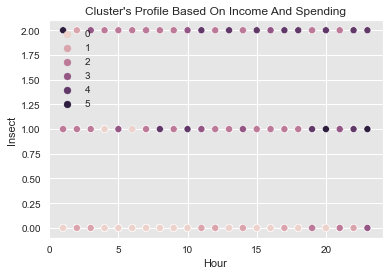

In [45]:
pl = sns.scatterplot(data = df,x=df["Hour"], y=df["Insect"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

##### Count clusters

In [61]:
clust_count = df.groupby(["Insect"])["Clusters"].value_counts()
clust_per = pd.DataFrame(clust_count.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())))
clust_per

Clusters
Insect Clusters           
0      0         47.456664
       1         25.745951
       3         14.890594
       2         10.287013
       5          1.562944
       4          0.056834
1      2         33.548156
       3         24.346581
       5         18.725385
       4         12.817759
       0          9.094164
       1          1.467956
2      4         42.815675
       2         26.705370
       5         23.076923
       3          7.256894
       1          0.145138

We can see that for the insect 0 with a high probability it will belong to the cluster 2 or 0, for the insect type 1 it will belong to the cluster 3 or 1, and for the insect 2 it will be part of the cluster 5. This is an oversimplified view to make our potential classification. However, the scope of our clustering is with no bigger ambition than bring some information in the EDA.

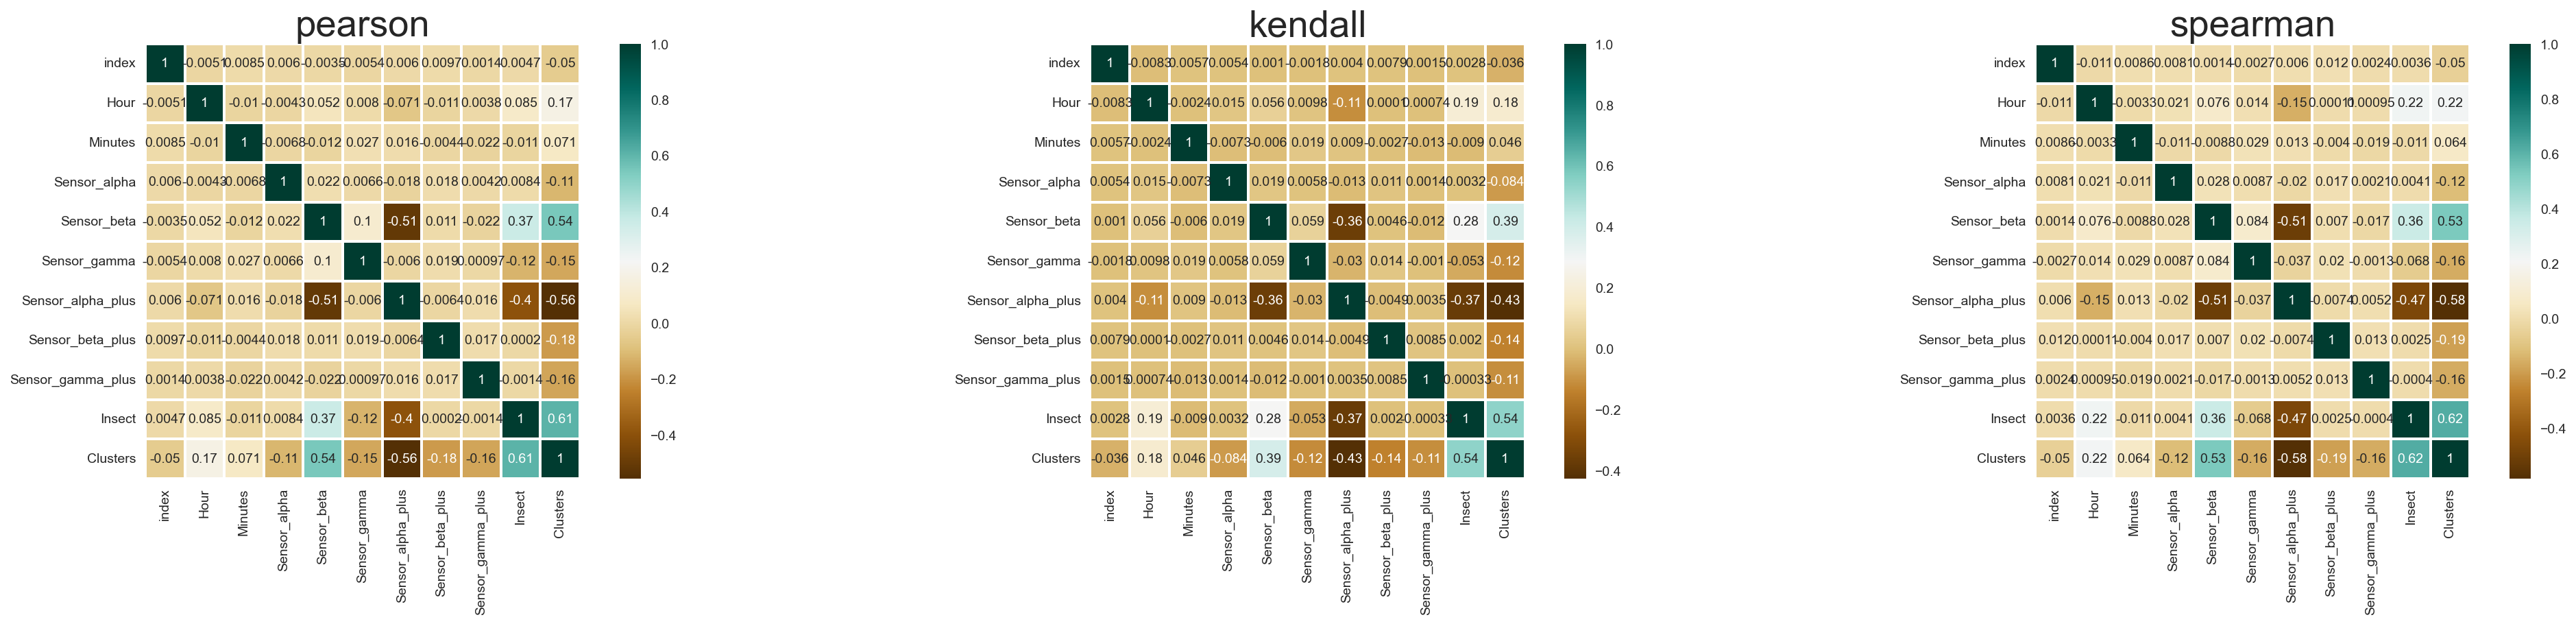

In [47]:
correlations(df)

We can deduce that clustering is related to the insect type, and also Sensor_gamma plays a bigger role.

In [48]:
c_df = pd.DataFrame(clust_count)
c_df.index = c_df.index.set_names(["Insect", "Cluster_num"])
c_df = c_df.reset_index()
c_df

Insect  Cluster_num  Clusters
0        0            0      1670
1        0            1       906
2        0            3       524
3        0            2       362
4        0            5        55
5        0            4         2
6        1            2       937
7        1            3       680
8        1            5       523
9        1            4       358
10       1            0       254
11       1            1        41
12       2            4       295
13       2            2       184
14       2            5       159
15       2            3        50
16       2            1         1

In [49]:
clust_lst = (c_0, c_1, c_2) = df[df["Insect"] == 0], df[df["Insect"] == 1], df[df["Insect"] == 2]

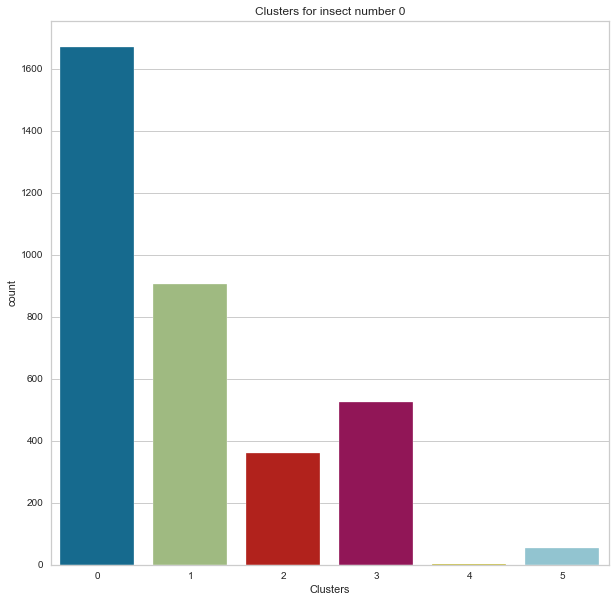

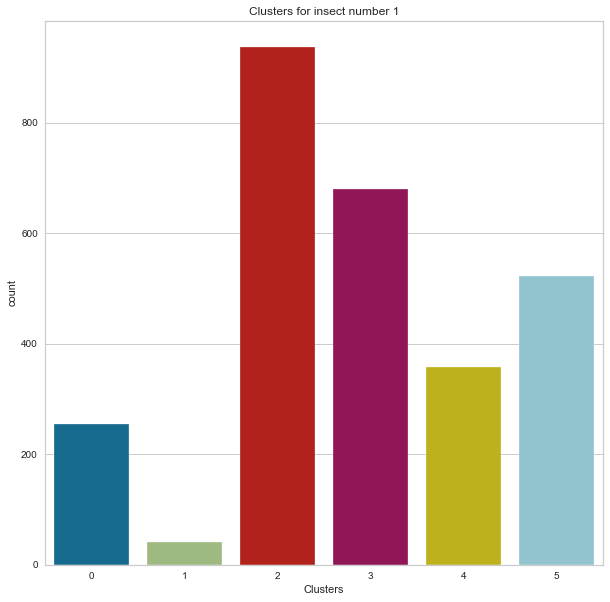

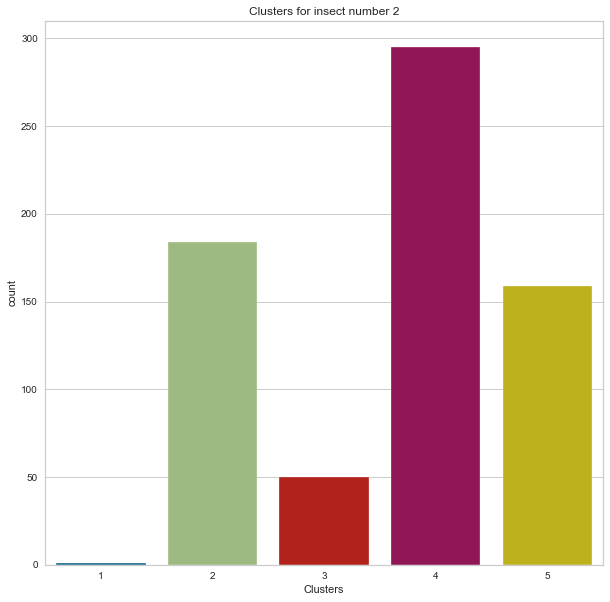

In [50]:
for index, value in enumerate(clust_lst):
    sns.set_style('whitegrid')
    pl, axs = plt.subplots(figsize=(10,10))
    pl = sns.countplot(x=value["Clusters"]) 
    pl.set_title("Clusters for insect number " + str(index))
    plt.show()

Clustering analysis and EDA conclusion: It would be interseting to study what would have been the results in case of using a probability based clustering model such as "Gaussian mixture model". However, our clustering testing was successful since we managed to group the data into a range of clusters that provided us insightful information about the type of insect the data belong.

##### Modelling & Evaluation

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
train_y = train["Insect"]
train_x = train.drop("Insect", 1)

In [53]:
x_test = pd.read_csv("test_x.csv").iloc[:, 1:].reset_index()
x_test.head()

index  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0      0    21       31    -72.083585   -11.434977    -52.961743   
1      1    21        3   -193.619980    40.137081     85.419244   
2      2    22       31     42.578382   -51.613402    125.055611   
3      3    21       25    -64.150951   287.306752    -70.965473   
4      4    18       11    193.750787   -61.989533   -110.347066   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  
0         -72.696385        145.299227        -143.856243  
1         -26.266801       -125.391237          80.904973  
2         182.136746         -9.726951        -114.913402  
3          13.789738         38.187260         137.761691  
4         -16.864786        148.541916         232.424616

In [54]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

In [55]:
ada.fit(train_x, train_y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [56]:
y_pred = ada.predict(x_test)
print(y_pred)

[1 1 0 ... 1 0 0]


In [57]:
final_results = x_test["index"]
final_results = pd.concat([pd.DataFrame(final_results), pd.DataFrame(y_pred)], axis=1)

In [58]:
final_results = final_results.set_axis(["Index", "Insect"], axis=1)
final_results.to_csv("results.csv", index = False)